In [1]:
import pandas as pd
import os

In [2]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


### 리뷰개수 하한선 설정

In [3]:
dir = '/content/drive/Shareddrives/ISLAB/Evinue'
files = os.listdir(dir)
print(len(files)) ## 총 202개 리뷰
review_num = []
for file in files:
  df = pd.read_excel(dir+'/'+file)
  # print(dir+'/'+file)
  review_num.append(df.shape[0])

202


In [4]:
review_num

[158,
 55,
 76,
 86,
 52,
 125,
 68,
 12,
 58,
 64,
 83,
 63,
 63,
 15,
 11,
 8,
 151,
 17,
 9,
 16,
 56,
 46,
 21,
 12,
 2,
 11,
 24,
 10,
 18,
 55,
 11,
 1,
 1,
 4,
 7,
 61,
 10,
 47,
 2,
 82,
 7,
 9,
 12,
 5,
 2,
 11,
 21,
 1,
 11,
 11,
 24,
 6,
 13,
 12,
 2,
 5,
 4,
 1,
 38,
 18,
 4,
 1,
 53,
 1,
 10,
 6,
 3,
 23,
 4,
 11,
 11,
 2,
 9,
 3,
 22,
 2,
 19,
 22,
 10,
 18,
 10,
 5,
 5,
 2,
 3,
 11,
 10,
 1,
 22,
 10,
 2,
 10,
 11,
 13,
 9,
 9,
 9,
 1,
 3,
 23,
 1,
 4,
 8,
 1,
 20,
 21,
 15,
 5,
 10,
 1,
 1,
 20,
 1,
 11,
 2,
 6,
 4,
 1,
 12,
 7,
 1,
 1,
 2,
 1,
 7,
 3,
 15,
 22,
 1,
 1,
 3,
 21,
 2,
 1,
 10,
 11,
 3,
 1,
 2,
 11,
 1,
 1,
 1,
 2,
 10,
 10,
 3,
 10,
 10,
 10,
 1,
 2,
 1,
 1,
 1,
 2,
 10,
 10,
 2,
 20,
 56,
 24,
 17,
 56,
 62,
 54,
 32,
 34,
 33,
 23,
 8,
 4,
 1,
 7,
 7,
 12,
 9,
 15,
 16,
 10,
 37,
 21,
 40,
 10,
 1,
 11,
 2,
 3,
 3,
 4,
 5,
 1,
 1,
 13,
 24,
 4,
 2,
 10,
 4,
 1,
 1,
 26]

box plot

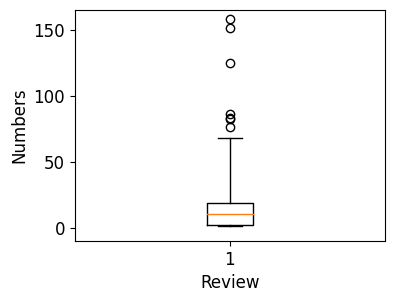

In [5]:
import matplotlib.pyplot as plt
import numpy as np

# 1. 기본 스타일 설정
plt.style.use('default')
plt.rcParams['figure.figsize'] = (4, 3)
plt.rcParams['font.size'] = 12

# 3. 그래프 그리기
fig, ax = plt.subplots()

box = ax.boxplot(review_num,whis=3)
ax.set_ylim(-10, 165.0)
ax.set_xlabel('Review')
ax.set_ylabel('Numbers')

plt.show()



*   box[‘whiskers’]: Q1, Q3, max, min 값
*   box[‘fliers’]: 수염 범위 밖의 데이터 포인트를 반환
* box[‘medians’]: 중앙값에 대한 정보를 갖는 Line2D 인스턴스의 리스트





In [6]:
whiskers = [item.get_ydata() for item in box['whiskers']]
medians = [item.get_ydata() for item in box['medians']]
fliers = [item.get_ydata() for item in box['fliers']]

print('whiskers:', whiskers)
print('fliers:', fliers)
print('medians:', medians)


whiskers: [array([2., 1.]), array([18.75, 68.  ])]
fliers: [array([158,  76,  86, 125,  83, 151,  82])]
medians: [array([10., 10.])]


In [7]:
## 분위수 값 직접 계산
t = sorted(list(review_num))
# print(sort_num)
q1_index = int(len(t) * 0.25)
q2_index = int(len(t) * 0.5)
q3_index = int(len(t) * 0.75)

q1 = t[q1_index - 1]
q2 = t[q2_index - 1]
q3 = t[q3_index - 1]

IQR = q3 - q1

max_standard = q3 + (1.5 * IQR)
min_standard = q1 - (1.5 * IQR)

print('q1, q2, q3: ',q1,q2,q3)
print('max, min: ',max_standard, min_standard)
# max_value = max(tips[tips['total_bill'] <= max_standard]['total_bill'])
# min_value = min(tips[tips['total_bill'] >= min_standard]['total_bill'])

q1, q2, q3:  2 10 18
max, min:  42.0 -22.0


review 개수 < q2 인 상품 제외

In [8]:
dir = '/content/drive/Shareddrives/ISLAB/Evinue'
files = os.listdir(dir)
# print(len(files)) ## 총 202개 리뷰
result = []
res_file= []
for file in files:
  df = pd.read_excel(dir+'/'+file)
  # print(dir+'/'+file)
  if df.shape[0]>=q2:
    result.append(df.shape[0])
    res_file.append(dir+'/'+file)

print(sorted(result), len(result))
print(res_file)

[10, 10, 10, 10, 10, 10, 10, 10, 10, 10, 10, 10, 10, 10, 10, 10, 10, 10, 10, 10, 11, 11, 11, 11, 11, 11, 11, 11, 11, 11, 11, 11, 11, 11, 12, 12, 12, 12, 12, 12, 13, 13, 13, 15, 15, 15, 15, 16, 16, 17, 17, 18, 18, 18, 19, 20, 20, 20, 21, 21, 21, 21, 21, 22, 22, 22, 22, 23, 23, 23, 24, 24, 24, 24, 26, 32, 33, 34, 37, 38, 40, 46, 47, 52, 53, 54, 55, 55, 56, 56, 56, 58, 61, 62, 63, 63, 64, 68, 76, 82, 83, 86, 125, 151, 158] 105
['/content/drive/Shareddrives/ISLAB/Evinue/헤라 선 메이트 데일리 선블록 SPF35 PA+++, 70ml, 1개.xlsx', '/content/drive/Shareddrives/ISLAB/Evinue/설화수 탄력3종 에센셜 리추얼 세트 + 쇼핑백, 1세트.xlsx', '/content/drive/Shareddrives/ISLAB/Evinue/설화수 자음2종 에센셜 컴포트 데일리 루틴 세트, 1세트.xlsx', '/content/drive/Shareddrives/ISLAB/Evinue/헤라 선 메이트 레포츠 프로 워터프루프 SPF50+ PA++++, 70ml, 1개.xlsx', '/content/drive/Shareddrives/ISLAB/Evinue/프리메라 알파인 베리 워터리 튜브형 크림 75ml, 1세트.xlsx', '/content/drive/Shareddrives/

In [9]:
with open('evinue_name.txt', 'w') as f:
  for line in res_file:
    f.write(line)

리뷰 개수 10개 이상인 상품만 하나의 엑셀 파일에 merge

In [10]:
!pip install konlpy

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 19.4/19.4 MB 66.6 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 465.3/465.3 kB 30.9 MB/s eta 0:00:00


In [11]:
import pandas as pd
import numpy as np

from konlpy.tag import Kkma, Komoran, Okt, Hannanum
import os
import re
import random

In [12]:
prod_list = res_file
new_df = pd.DataFrame({"리뷰 내용":[0]})

for prod_path in prod_list:
    df = pd.read_excel(prod_path)
    len = df.shape[0]
    idx = random.sample(range(len),10)
    
    for row in idx:
      add = df['리뷰 내용'].iloc[row]
      li = []
      li.append(add)
      # print(add)
      # print(type(add))
      new_df = new_df.append(li, ignore_index = True)



<ipython-input-12-7342ff08d765>:15: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  new_df = new_df.append(li, ignore_index = True)
<ipython-input-12-7342ff08d765>:15: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  new_df = new_df.append(li, ignore_index = True)
<ipython-input-12-7342ff08d765>:15: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  new_df = new_df.append(li, ignore_index = True)
<ipython-input-12-7342ff08d765>:15: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  new_df = new_df.append(li, ignore_index = True)
<ipython-input-12-7342ff08d765>:15: FutureWarning: The frame.append method is deprecated and will be removed from pandas in 

In [13]:
new_df= new_df.drop([0], axis = 0)

In [14]:
new_df

,리뷰 내용,0
1,NaN,어머니께서 늘 쓰시는 선크림입니다.어머니께서 인터넷 주문에 서투르셔서 제가 주문해 ...
2,NaN,십년이면 강산은 변하지요~ 그런데 사람들의 인식은 10년이면 바뀔까요? 사람들의 ...
3,NaN,❣️헤라 선크림 메이트 데일리 선블록 사용후기❣️끈적임이 없고 발림 좋고 백탁현상이...
4,NaN,"헤라 선 메이트 데일리 선블록 SPF35 PA+++, 700ml, 1개 구입~** ..."
5,NaN,하루 사이에 가격이 내려서 기분이 별로 좋지않아요.상품은 좋아요.
...,...,...
1046,NaN,바를때 하얘져서 후기에 백탁 없는거 보고 선택한거라 어쩌나 햇는데 펴 바르니 괜찮네요.~
1047,NaN,잘발리고 가볍고 좋아요 텁텁하지도 않고 많이 건조하지도 않고 적당하고 딱 좋아요
1048,NaN,어떤것들은 기초후에 바르면 밀려서 닦아내곤 하는데 이건 발림성 도좋고 촉촉하니 랑...
1049,NaN,평이넘좋아서 구매했답니다


In [15]:
new_df = new_df.drop(['리뷰 내용'], axis = 1)
new_df

,0
1,어머니께서 늘 쓰시는 선크림입니다.어머니께서 인터넷 주문에 서투르셔서 제가 주문해 ...
2,십년이면 강산은 변하지요~ 그런데 사람들의 인식은 10년이면 바뀔까요? 사람들의 ...
3,❣️헤라 선크림 메이트 데일리 선블록 사용후기❣️끈적임이 없고 발림 좋고 백탁현상이...
4,"헤라 선 메이트 데일리 선블록 SPF35 PA+++, 700ml, 1개 구입~** ..."
5,하루 사이에 가격이 내려서 기분이 별로 좋지않아요.상품은 좋아요.
...,...
1046,바를때 하얘져서 후기에 백탁 없는거 보고 선택한거라 어쩌나 햇는데 펴 바르니 괜찮네요.~
1047,잘발리고 가볍고 좋아요 텁텁하지도 않고 많이 건조하지도 않고 적당하고 딱 좋아요
1048,어떤것들은 기초후에 바르면 밀려서 닦아내곤 하는데 이건 발림성 도좋고 촉촉하니 랑...
1049,평이넘좋아서 구매했답니다


In [16]:
new_df = new_df.rename(columns={0:'리뷰 내용'})
new_df

,리뷰 내용
1,어머니께서 늘 쓰시는 선크림입니다.어머니께서 인터넷 주문에 서투르셔서 제가 주문해 ...
2,십년이면 강산은 변하지요~ 그런데 사람들의 인식은 10년이면 바뀔까요? 사람들의 ...
3,❣️헤라 선크림 메이트 데일리 선블록 사용후기❣️끈적임이 없고 발림 좋고 백탁현상이...
4,"헤라 선 메이트 데일리 선블록 SPF35 PA+++, 700ml, 1개 구입~** ..."
5,하루 사이에 가격이 내려서 기분이 별로 좋지않아요.상품은 좋아요.
...,...
1046,바를때 하얘져서 후기에 백탁 없는거 보고 선택한거라 어쩌나 햇는데 펴 바르니 괜찮네요.~
1047,잘발리고 가볍고 좋아요 텁텁하지도 않고 많이 건조하지도 않고 적당하고 딱 좋아요
1048,어떤것들은 기초후에 바르면 밀려서 닦아내곤 하는데 이건 발림성 도좋고 촉촉하니 랑...
1049,평이넘좋아서 구매했답니다


In [17]:
def clean_str(text):
    text = str(text)
    pattern = '([a-zA-Z0-9_.+-]+@[a-zA-Z0-9-]+\.[a-zA-Z0-9-.]+)' # E-mail제거
    text = re.sub(pattern=pattern, repl='', string=text)
    pattern = '(http|ftp|https)://(?:[-\w.]|(?:%[\da-fA-F]{2}))+' # URL제거
    text = re.sub(pattern=pattern, repl='', string=text)
    pattern = '([ㄱ-ㅎㅏ-ㅣ]+)'  # 한글 자음, 모음 제거
    text = re.sub(pattern=pattern, repl='', string=text)
    pattern = '<[^>]*>'         # HTML 태그 제거
    text = re.sub(pattern=pattern, repl='', string=text)

    text = re.sub('\n', '.', string=text)

    pattern = '[^\w\s\n?0-9]'         # 특수기호제거
    text = re.sub(pattern=pattern, repl=' ', string=text)
    text = re.sub('[-=+,ㅜ^^#/\:^$@*\"※~&%ㆍ!』\\‘|\(\)\[\]\<\>`\'…》]','', string=text)
    
    text = text.strip()
    text = text.replace('    ', ' ')
    text = text.replace('   ', ' ')
    text = text.replace('  ', ' ')
    
    
    # for n in prod_name:
    #     text = text.replace(n, '')

    # pattern_punctuation = re.compile(r'[^\w\s]')
    # text = pattern_punctuation.sub('', text)
    return text 

In [18]:
# new_df1 = pd.DataFrame({"리뷰 내용":[0]})
new = []
text = new_df["리뷰 내용"].values.tolist()
for review in text:
    # new.append(clean_str(review))
    new.append(review)


In [19]:
new

['어머니께서 늘 쓰시는 선크림입니다.어머니께서 인터넷 주문에 서투르셔서 제가 주문해 드렸는데확인하니 상자가 이상하게 훼손되어서 왔더군요.보통은 비닐에 담겨오니 찌그러지거나 구겨지는 건 많이 봤는데이건 제품 상자 옆 부분이 분리되고 살짝 찢겨져 있었습니다.도착 당시엔 제가 있었어서 직접 확인하고 사진은 찍어놨는데생각같아선 찝찝해서 교환하고 싶었으나어머니께서 이래저래 다시 포장해서 교환하시기에 힘드실 거 같아서그냥 쓰려 합니다.그래도 검수는 더 꼼꼼하게 해서 보내주셨으면 하는 바람입니다.',
 '십년이면 강산은 변하지요~  그런데 사람들의 인식은 10년이면 바뀔까요? 사람들의 인식을 바꾸기엔 더욱 혁신적인 이슈와 더 오랜 시간이 걸릴거예요.저에게 제가 스무살쯤되었을때 그러니까 한 20년전에는요, 헤라는.. 엄마가쓰는 좀 비싼 방판 화장품이란 인식이 강했어요!지금은요? 헤라는 백화점 브랜드죠~~제가 헤라를 백화점에서 구입하기 시작한것은 한 십년쯤 전부터예요.기초를 제외하고 색조 부분에서의 헤라는..명실상부 국내 탑인듯 합니다.그중에서도 스테디셀러 가장 꾸준하게 제일 잘팔리는것이 바로 데일리썬크림 이지요.지성피부와 한여름을  제외하고 발림성 민감도제품의 질이아주 만족스러워요.꽤 촉촉하게 발리고 매끄럽고 빛나는 피부로 정돈해줍니다. 연한  살구색 스킨톤 색상이며 뻑뻑하거나 백탁없이 로션크림정도의 되직함으로 부드럽게 촉촉하게 발립니다.헤라블랙 쿠션이 살짝 매트한데 그 전에 데일리 썬크림으로 메베바르듯 발라주면 찰떡이예요.전 헤라 썬크림만 6년째네요.. 중간중간 더 싼거 좀더가벼운제형 기웃거리다 다시 리턴 했어요.가격도 쿠팡가격이면 비싸지않고 정품이고 백화점 가서 비싸게 살필요가 없어졌네요 너무 좋아요.제리뷰가 도움이 되셨다면 도움이되요 버튼 꾸욱꾸욱 눌러주세요 감사합니다 ⚘️',
 '❣️헤라 선크림 메이트 데일리 선블록 사용후기❣️끈적임이 없고 발림 좋고 백탁현상이 없으면서 발랐을 때 산뜻한 느낌의 선크림이에요! SPF35pA+++, 70ml 헤라 선크림 가격 대비 정

In [20]:
new_df1 = pd.DataFrame({"리뷰 내용":new})

In [21]:
new_df1.to_excel("/content/drive/MyDrive/텍스트분석2023/merge_data/Evinue_nopre.xlsx")